![Cover Image](https://github.com/MichaelRichardson12/uk-police-notebook/blob/master/header_image.png?raw=true)

# Crime Stats in the UK
#### October 2018 - October 2019

In this note book I want to have a look at the crimes stats here in the UK for the past year. I am using the data provided by https://data.police.uk/, the data is under [Open Government Licence v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/) license. This is just a personal project to better my data science skills and I hope you can find some interesting conclusions here.

## Work Flow

I am going to use the following work flow:
    1. Download the data from the link below and import it using Pandas.
    2. Inspect the data to see what information is available.
    3. Analyze the data.
    4. Wrange, clean and prepare the data.
    5. Try to model and predict the data.
    6. Visualize, report, and present the findings.
    
Download link: [https://data.police.uk/data/](https://data.police.uk/data/)
Useful links to explain the columns and get the different crime types, [https://data.police.uk/about/](https://data.police.uk/about/), [https://www.police.uk/about-this-site/faqs/#what-do-the-crime-categories-mean](https://www.police.uk/about-this-site/faqs/#what-do-the-crime-categories-mean).

The cover picture was taken by Nikolay Dimitrov (@ncipio) from Unsplash.

In [1]:
# Data analysis and wrangling
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Download the data

The data file was about 500Mb for one years worth of data. When it was unzipped it was around 2Gb. GitHub doesn't allow you to upload such large files to a repo so I just left them out but I had the files locally under the fodler called 'data'.

Here I got all of the contents of the data folder. Each month was a folder ('yyyy-MM.csv') and inside eash folder was the data for each of the police forces in the UK. It seemed that each county had a police force but I didn't go and check that. I loaded each csv file using Pandas and then joined it to the main dataframe so that all of the data was in one file.

In [2]:
df = None
months = []
file_count = 0
debug_limit = 2

folder_list = os.listdir('data')
for folder in folder_list:
    print('')
    if debug_limit > len(months):
        months.append(folder)
        for file in os.listdir('data/' + folder):
            print('.', end = '')
            df_temp = pd.read_csv('data/' + folder + '/' + file)

            if df is None:
                df = df_temp
            else:
                df = pd.concat([df, df_temp], sort=False, ignore_index=True)

            file_count += 1

print('There is {} months worth of data from {} files'.format(len(months), file_count))


........................................................................................
........................................................................................










There is 2 months worth of data from 176 files


## Inspect the data

Pandas helps describe the dataset to answer the following questions early on. Let print the column names out and have a look at some of the data in the columns.

In [3]:
print(df.columns.values)

['Crime ID' 'Month' 'Reported by' 'Falls within' 'Longitude' 'Latitude'
 'Location' 'LSOA code' 'LSOA name' 'Outcome type' 'Crime type'
 'Last outcome category' 'Context']


In [4]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category,Context
0,a1a5a8d0b1e24d7f8ee52b806c7605c50c8fe839f142a8...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,NaN,NaN,NaN
1,07f0fe80ff0cfb2c9c701e4b2d799cb03ebc25bca82356...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,NaN,NaN,NaN
2,843e533914dd107c15506ffc847f646d61b47c543a9999...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified,NaN,NaN,NaN
3,891b76792b62c4aa3292184bafb752caf3e7ef2e958f5c...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,NaN,NaN,NaN
4,a542cc68dbd9a5a0d9a2030435565e91835770cf73a25a...,2019-03,West Mercia Police,West Mercia Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect,NaN,NaN,NaN


###### What feature are available in the dataset?

| Column         | Description                                  |
| :--------------|:---------------------------------------------|
| Crime ID       | This is the ID provided by the dataset.      |
| Month          | This is the same as the folder the data came from, it is the month the crime happened.      |
| Reported by    | The force that provided the data about the crime.      |
| Falls within   | The force that provided the data about the crime.      |
| Longitude      | The anonymised latitude of the coordinates of the crime.      |
| Latitude       | The anonymised longitude of the coordinates of the crime.     |
| Location       | The name of the sreet the incident occurred.     |
| LSOA code      | References to the Lower Layer Super Output Area that the anonymised point falls into.      |
| LSOA name      | References to the Lower Layer Super Output Area that the anonymised point falls into.      |
| Outcome type   | The outcome of the prosecution.      |
| Crime type     | The type of crime commited.     |
| Last outcome category   | A reference to whichever of the outcomes associated with the crime occurred most recently.        |
| Context        | A field provided for forces to provide additional human-readable data about individual crimes.|


###### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

    - Categorical: Reported by, Falls within, LSOA code, Outcome type, LSOA name, Crime type. 


###### Which features are numerical?

These values differ from sample to sample. Are these features discrete, continuous or time based values?

    - Continous: Latitude, Longitude. 
    - Discrete: None.
    - Time: Month.

###### Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

    - There are no mixed data types in the dataset

###### Which features may contain errors or typos?

This is more difficult to review for a large dataset as you can't go through each row and review it.

    - Luckily here there are no rows that will cause any errors.

###### Which features contain blank, null or empty values?

This is easy to review as we can just count the number of missing entries in the dataset. These features may require correcting or dropped.

    - The location properties, crime type and last outcome category all have null entries.

In [5]:
df.isnull().sum()

Crime ID                  238418
Month                          0
Reported by                    0
Falls within                   0
Longitude                  41564
Latitude                   41564
Location                       0
LSOA code                  68241
LSOA name                  68241
Outcome type             1131473
Crime type                758772
Last outcome category    1014496
Context                  1890245
dtype: int64

###### What are the data types for various features?

There are 3 floats (coordinates) and the rest are strings/objects.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890245 entries, 0 to 1890244
Data columns (total 13 columns):
Crime ID                 object
Month                    object
Reported by              object
Falls within             object
Longitude                float64
Latitude                 float64
Location                 object
LSOA code                object
LSOA name                object
Outcome type             object
Crime type               object
Last outcome category    object
Context                  float64
dtypes: float64(3), object(10)
memory usage: 187.5+ MB


###### What is the distribution of categorical features?
    - There are 45 counties (Reported by)
    - There are 23 different outcome types
    - There are 14 categories of crime
    - There are 26 last outcome types

In [7]:
df.describe(include=['O'])

,Crime ID,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Outcome type,Crime type,Last outcome category
count,1651827,1890245,1890245,1890245,1890245,1822004,1822004,758772,1131473,875749
unique,1124274,2,45,45,276374,34742,34742,24,14,26
top,e22dfff770cd32f54941621e0b4a1000168dfa2fbfbd6a...,2019-03,Metropolitan Police Service,Metropolitan Police Service,On or near Supermarket,E01033010,Leeds 111B,Investigation complete; no suspect identified,Violence and sexual offences,Investigation complete; no suspect identified
freq,29,975615,236645,236645,68373,3060,3060,320908,320601,285358


###### Correcting

    1. The crime ID can be dropped.
    2. The falls within column can be dropped.
    3. Both of the LSOA columns can be dropped.
    4. The context can be dropped as it has no entries
    
We may just want to replace the missing data in crime type and outcome type with a 'missing' field. The latitude and longitude might not be important at the moment but we could use it to plot on a map the different areas where crime occurs.

## Wrangle, clean and prepare data



In [8]:
data = df.copy()

In [9]:
# Drop the columns that aren't needed
df = df.drop(columns=['Crime ID', 'Falls within', 'LSOA code', 'LSOA name', 'Context'])

In [10]:
# Fill in the NaN entries
df['Outcome type'] = df['Outcome type'].fillna('No outcome yet')
df['Crime type'] = df['Crime type'].fillna('Not available')
df['Last outcome category'] = df['Last outcome category'].fillna('No outcome yet')

In [11]:
# Rename columns
df.columns = ['month', 'reported_by', 'lat', 'lng', 'location', 'outcome', 'crime', 'last_outcome']

In [12]:
# Reduce the number of outcomes
outcome_mapping = {
    "Action to be taken by another organisation": "Pending", 
    "Court case unable to proceed": "Dismissed", 
    "Defendant found not guilty": "Dismissed", 
    "Defendant sent to Crown Court": "Pending", 
    "Formal action is not in the public interest": "Other",
    "Investigation complete; no suspect identified": "Dismissed",
    "Local resolution": "Dismissed",
    "No outcome yet": "Pending",
    "Offender deprived of property": "Sentenced",
    "Offender fined": "Sentenced",
    "Offender given a caution": "Sentenced",
    "Offender given a drugs possession warning": "Sentenced",
    "Offender given absolute discharge": "Sentenced",
    "Offender given community sentence": "Sentenced",
    "Offender given conditional discharge": "Sentenced",
    "Offender given penalty notice": "Sentenced",
    "Offender given suspended prison sentence": "Sentenced",
    "Offender ordered to pay compensation": "Sentenced",
    "Offender otherwise dealt with": "Sentenced",
    "Offender sent to prison": "Sentenced",
    "Suspect charged": "Sentenced",
    "Suspect charged as part of another case": "Sentenced",
    "Unable to prosecute suspect": "Dismissed"
}

df['r_outcome'] = df['outcome'].map(outcome_mapping)

In [13]:
# Reduce the number of crimes
crime_mapping = {
    "Anti-social behaviour": "Minor", 
    "Bicycle theft": "Minor", 
    "Burglary": "Intermediate", 
    "Criminal damage and arson": "Major", 
    "Drugs": "Major",
    "Not available": "Not available",
    "Other crime": "Major",
    "Other theft": "Intermediate",
    "Possession of weapons": "Intermediate",
    "Public order": "Minor",
    "Robbery": "Major",
    "Shoplifting": "Minor",
    "Theft from the person": "Major",
    "Vehicle crime": "Intermediate",
    "Violence and sexual offences": "Major"
}

df['r_crime'] = df['crime'].map(crime_mapping)
df.head()

,month,reported_by,lat,lng,location,outcome,crime,last_outcome,r_outcome,r_crime
0,2019-03,West Mercia Police,NaN,NaN,No location,Unable to prosecute suspect,Not available,No outcome yet,Dismissed,Not available
1,2019-03,West Mercia Police,NaN,NaN,No location,Unable to prosecute suspect,Not available,No outcome yet,Dismissed,Not available
2,2019-03,West Mercia Police,NaN,NaN,No location,Investigation complete; no suspect identified,Not available,No outcome yet,Dismissed,Not available
3,2019-03,West Mercia Police,NaN,NaN,No location,Unable to prosecute suspect,Not available,No outcome yet,Dismissed,Not available
4,2019-03,West Mercia Police,NaN,NaN,No location,Unable to prosecute suspect,Not available,No outcome yet,Dismissed,Not available


## Analyze the data by visualization

#### Types of outcomes

Visualise the total break down of outcomes that occurs overall and the latest month.

In [14]:
df_crime_total = df.groupby(['r_outcome']).size().reset_index()
df_crime_total.rename(columns={0: 'count'}, inplace=True)

df_crime_pm = df.groupby(['month', 'r_outcome']).size().reset_index()
df_crime_pm.rename(columns={0: 'count'}, inplace=True)
df_crime_pm = df_crime_pm[df_crime_pm.month == '2019-04']

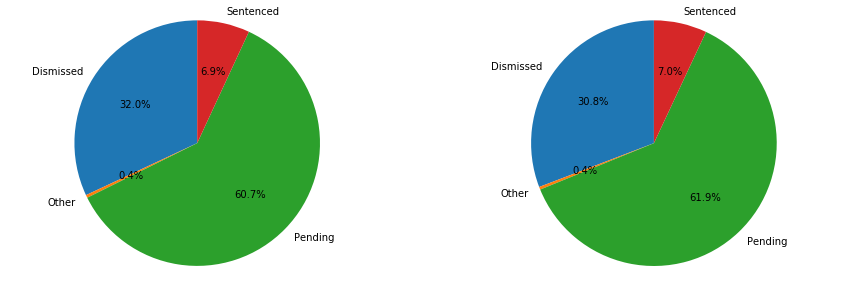

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(df_crime_total['count'], labels=df_crime_total['r_outcome'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

ax2.pie(df_crime_pm['count'], labels=df_crime_pm['r_outcome'], autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

plt.show()

###### Observations:

###### Decisions:

#### Types of crime

Visualise the total break down of crimes that occurs overall and the latest month.

In [16]:
df_crime_total = df.groupby(['r_crime']).size().reset_index()
df_crime_total.rename(columns={0: 'count'}, inplace=True)

df_crime_type = df.groupby(['month', 'r_crime']).size().reset_index()
df_crime_type.rename(columns={0: 'count'}, inplace=True)
df_crime_type = df_crime_type[df_crime_type.month == '2019-04']

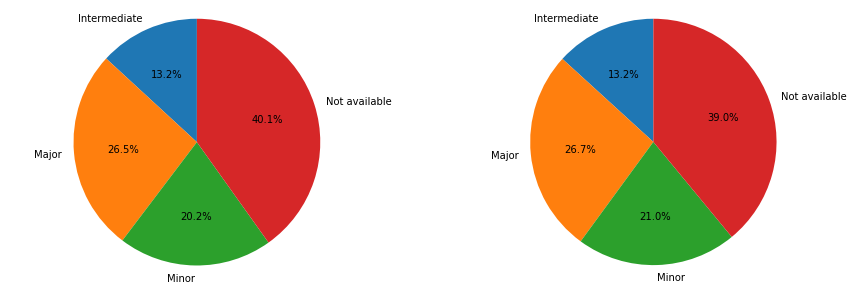

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(df_crime_total['count'], labels=df_crime_total['r_crime'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

ax2.pie(df_crime_type['count'], labels=df_crime_type['r_crime'], autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

plt.show()

###### Observations:

###### Decisions:

#### Average crime

In [18]:
df_total = df.groupby(['month']).size().reset_index()
df_total['average'] = df_total.rolling(len(df_total)).mean()
df_total.rename(columns={0: 'count'}, inplace=True)
df_total['average'] = df_total['average'].fillna(df_total['count'][0])

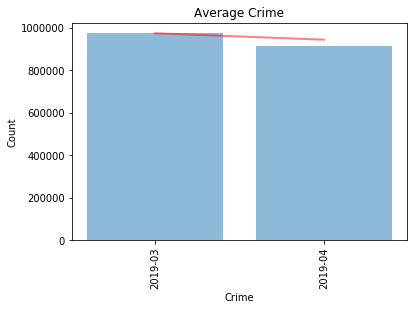

In [19]:
plt.bar(df_total.month, df_total['count'], align='center', alpha=0.5)
plt.plot(df_total.month, df_total.average, lw=2, c='r', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Crime')
plt.title('Average Crime')

plt.show()

###### Observations:

###### Decisions:

## Model, predict and solve

In [20]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
df.nunique()

month                2
reported_by         45
lat             377404
lng             368943
location        276374
outcome             25
crime               15
last_outcome        27
r_outcome            4
r_crime              4
dtype: int64

In [22]:
df_model = df.copy()

df_model = df_model.dropna(subset=['r_outcome'])
df_model.reported_by = pd.Categorical(df_model.reported_by)
df_model.r_outcome = pd.Categorical(df_model.r_outcome)

df_model.reported_by = df_model.reported_by.cat.codes
df_model.r_outcome = df_model.r_outcome.cat.codes

df_model['r_crime'] = pd.Categorical(df_model['r_crime'])
crimes = pd.get_dummies(df_model['r_crime'], prefix = 'crime_')
df_model = pd.concat([df_model, crimes], axis=1)

df_model = df_model.drop(columns=['month', 'lat', 'lng', 'location', 'outcome', 'r_crime', 'last_outcome', 'crime'])

In [23]:
df_model.nunique()

reported_by             45
r_outcome                4
crime__Intermediate      2
crime__Major             2
crime__Minor             2
crime__Not available     2
dtype: int64

In [24]:
df_model.head()

,reported_by,r_outcome,crime__Intermediate,crime__Major,crime__Minor,crime__Not available
0,41,0,0,0,0,1
1,41,0,0,0,0,1
2,41,0,0,0,0,1
3,41,0,0,0,0,1
4,41,0,0,0,0,1


In [25]:
X = df_model.drop(columns=['r_outcome'])
y = df_model[['r_outcome']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
y_train.head()

,r_outcome
757389,0
1275036,0
1154389,0
1525435,2
744193,0


In [28]:
# Logistic Regression
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

/Users/michael/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michael/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


92.14

In [ ]:
# Support Vector Machines
svc = SVC().fit(X_train, y_train)

acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

/Users/michael/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michael/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn